<h2>Análisis de sentimientos</h2>

*Análisis de sentimiento se refiere al uso de procesamiento de lenguaje natural, análisis de texto y lingüística computacional para identificar y extraer información subjetiva de los recursos.*

In [9]:
# Importamos las librerias
import pandas as pd
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [10]:
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [11]:
data = pd.read_csv('dataset/imdb_movie_5000.csv')

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
None


In [13]:
data.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televis show appeal to quit as mani d...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [14]:
print(data['sentiment'].value_counts())

positive    2519
negative    2481
Name: sentiment, dtype: int64


In [15]:
# remover las etiquetas html que contenga las columnas texto
# Remover etiquetas HTML
def remover_html(texto):
    return re.sub('<.*?>', '', texto)


data['review'] = data['review'].apply(remover_html)

data.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televis show appeal to quit as mani d...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [16]:
# Utilizaremos una funcion para convertir el corpus en minuscula

data['review'] = data['review'].str.lower()
data.head()


,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televis show appeal to quit as mani d...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [17]:
# eliminamos palabras vacias del corpus
# Remover stopwords
def remover_stopwords(texto):
    palabras = word_tokenize(texto)
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]
    return ' '.join(palabras_filtradas)

data['review'] = data['review'].apply(remover_stopwords)
data.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televis show appeal to quit as mani d...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [18]:
# Inicializar el stemmer
stemmer = PorterStemmer()

# Función para derivar palabras a su forma raíz (stem)
def derivar_stem(texto):
    palabras = word_tokenize(texto)  # Tokenizar el texto en palabras
    palabras_stem = [stemmer.stem(palabra) for palabra in palabras]  # Derivar cada palabra a su forma raíz
    texto_stem = ' '.join(palabras_stem)  # Unir las palabras derivadas en una cadena de texto
    return texto_stem

# Aplicar la función a la columna 'review' de data_sample
data['review'] = data['review'].apply(derivar_stem)

# Mostrar las primeras filas del DataFrame
data.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televi show appeal to quit as mani di...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [19]:

data.to_csv('dataset/imdb_movie_depurado.csv', header=True, index=False)


<h3># Naive Bayes: Analisis de sentimiento<h2>

In [20]:
df_depurado = pd.read_csv('dataset/imdb_movie_depurado.csv')
df_depurado.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televi show appeal to quit as mani di...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [21]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_depurado['review'], df_depurado['sentiment'], test_size=0.2, random_state=42)

In [22]:
# Vectorización del texto
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [23]:
# Entrenar modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [24]:
# Evaluar modelo
y_pred = nb_classifier.predict(X_test_vect)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.815


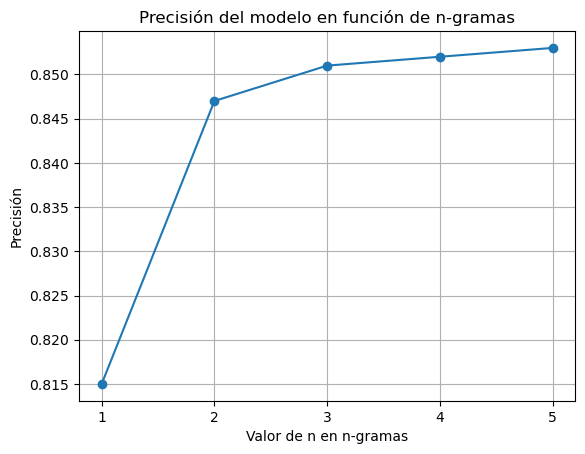

In [25]:
import matplotlib.pyplot as plt

# Creamos una lista para almacenar los valores de precisión
accuracies = []

# Vamos a probar con distintos valores de n-gramas
for n in range(1, 6):
    # Vectorización del texto
    vectorizer = CountVectorizer(ngram_range=(1, n))
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    # Entrenar modelo Naive Bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_vect, y_train)

    # Evaluar modelo
    y_pred = nb_classifier.predict(X_test_vect)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficamos los resultados
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Precisión del modelo en función de n-gramas')
plt.xlabel('Valor de n en n-gramas')
plt.ylabel('Precisión')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

<h3># TextBlob: Analisis de sentimiento<h2>

In [26]:
from textblob import TextBlob

df_blob = pd.read_csv('dataset/imdb_movie_depurado.csv')
df_blob.head()

,review,sentiment
0,i realli like thi summerslam due to the look o...,positive
1,not mani televi show appeal to quit as mani di...,positive
2,the film quickli get to major chase scene with...,negative
3,jane austen would definit approv of thi one ! ...,positive
4,expect were somewhat high for when i went to s...,negative


In [27]:
# Creamos una función para realizar el análisis de sentimientos utilizando TextBlob
def analisis_sentimientos(texto):
    testimonio = TextBlob(texto)
    # Utilizamos el método sentiment.polarity para obtener la polaridad del sentimiento (-1 a 1)
    polaridad = testimonio.sentiment.polarity
    # Definimos una condición para clasificar el sentimiento como positivo, negativo o neutro
    if polaridad > 0:
        return 'positivo'
    elif polaridad < 0:
        return 'negativo'
    else:
        return 'neutro'

In [28]:
# Aplicamos la función a la columna 'review' de nuestro conjunto de datos
df_blob['sentimiento_textblob'] = df_blob['review'].apply(analisis_sentimientos)


In [29]:
# Mostramos las primeras filas del DataFrame con la nueva columna de sentimiento
print(df_blob[['review', 'sentimiento_textblob']].head())

                                              review sentimiento_textblob
0  i realli like thi summerslam due to the look o...             positivo
1  not mani televi show appeal to quit as mani di...             positivo
2  the film quickli get to major chase scene with...             positivo
3  jane austen would definit approv of thi one ! ...             positivo
4  expect were somewhat high for when i went to s...             positivo


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular las métricas de clasificación
print("Métricas de clasificación para el análisis de sentimientos con TextBlob:")
print(classification_report(df_blob['sentiment'], df_blob['sentimiento_textblob']))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(df_blob['sentiment'], df_blob['sentimiento_textblob'])
print("Matriz de confusión:")
print(conf_matrix)

Métricas de clasificación para el análisis de sentimientos con TextBlob:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00    2481.0
    negativo       0.00      0.00      0.00       0.0
      neutro       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00    2519.0
    positivo       0.00      0.00      0.00       0.0

    accuracy                           0.00    5000.0
   macro avg       0.00      0.00      0.00    5000.0
weighted avg       0.00      0.00      0.00    5000.0

Matriz de confusión:
[[   0  808   10    0 1663]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0  169    6    0 2344]
 [   0    0    0    0    0]]


C:\Users\samir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samir\anaconda3\lib\site-packages\sklearn\metrics\_cla